Especialização em Inteligência Artificial

Lista de Exercícios 02 da disciplina de Análise e Previsão de Séries Temporais

Prof. Carlos Severiano

Aluno: Marco Antonio do Nascimento

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import gauss
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
from datetime import datetime
import locale
from random import gauss, randrange, random
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.regression.linear_model as rlm
from sklearn.linear_model import LinearRegression
from numpy import polyfit
from matplotlib.pyplot import rcParams
rcParams ['figure.figsize'] = 15, 6

In [20]:
dados = pd.read_excel('C:/vendas_brasil.xlsx')

In [21]:
dados.columns

Index(['Mês', 'Brasil'], dtype='object')

In [22]:
vendas_brasil_series = pd.Series(dados['Brasil'].values,index=dados['Mês'])

<function matplotlib.pyplot.show(close=None, block=None)>

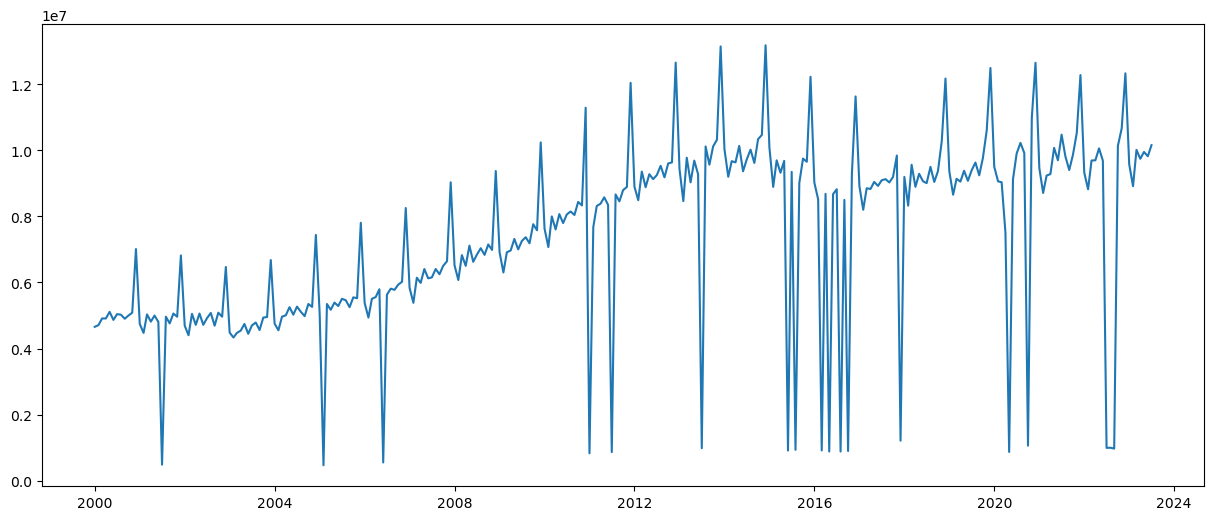

In [23]:
plt.plot(vendas_brasil_series)
plt.show

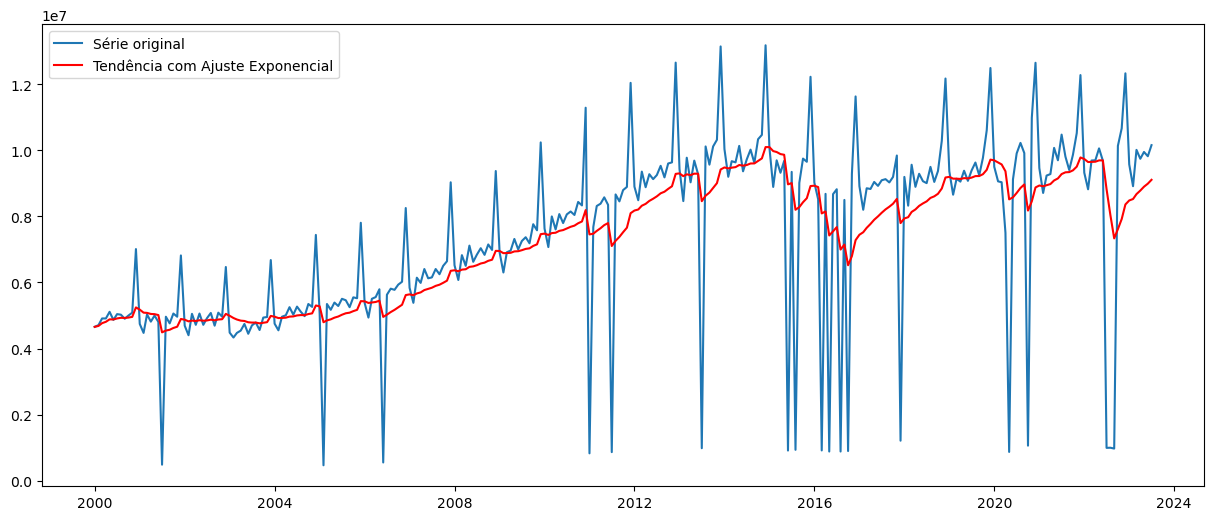

In [24]:
# 1. Estimando a tendência através de ajuste exponencial

exp_smooth =  vendas_brasil_series.ewm(alpha=0.1)
rolling_mean = exp_smooth.mean() 
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(rolling_mean,color='red', label='Tendência com Ajuste Exponencial')
plt.legend(loc='best')
plt.show()

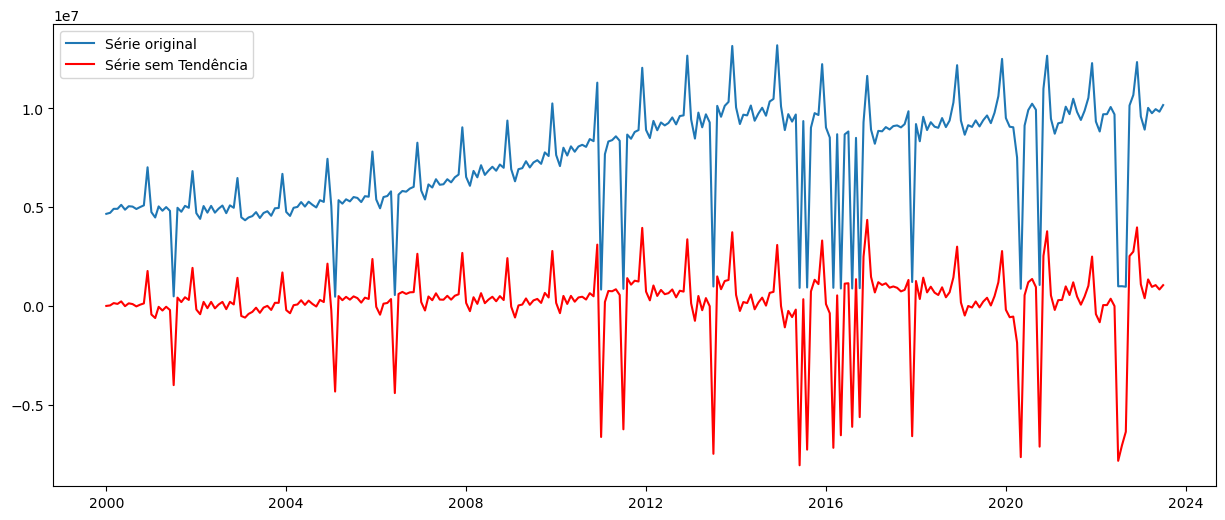

In [25]:
# 2. Eliminando a tendência estimada

sazonalidade_ruido = vendas_brasil_series - rolling_mean
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(sazonalidade_ruido, color='red', label='Série sem Tendência')
plt.legend(loc='best')
plt.show()

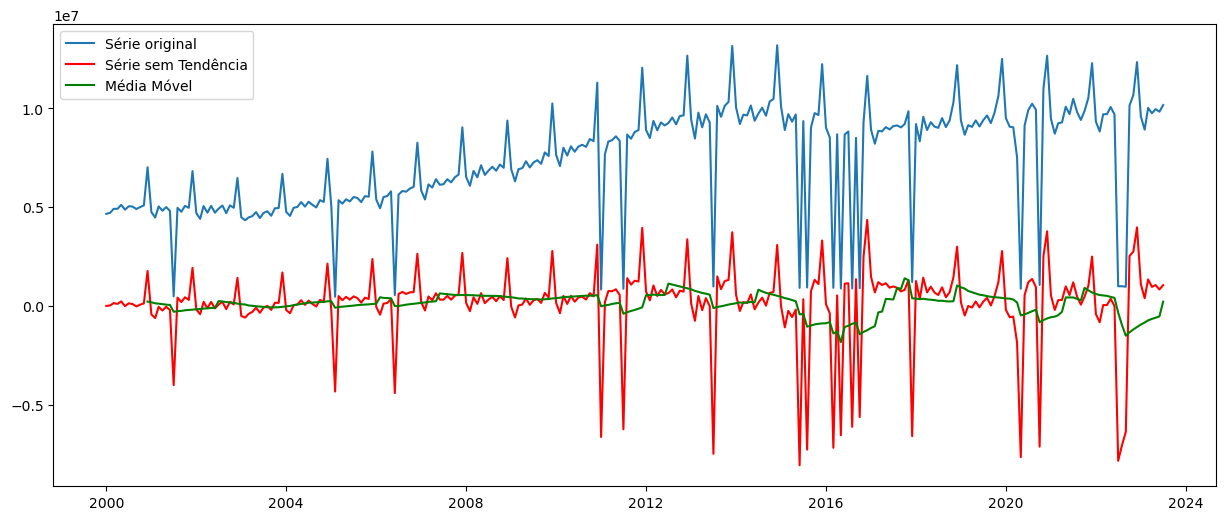

In [26]:
# 3. Estimando a sazonalidade através de médias móveis

media_movel = sazonalidade_ruido.rolling(window=12).mean()

plt.plot(vendas_brasil_series, label='Série original')
plt.plot(sazonalidade_ruido, color='red', label='Série sem Tendência')
plt.plot(media_movel, color='green', label='Média Móvel')
plt.legend(loc='best')
plt.show()

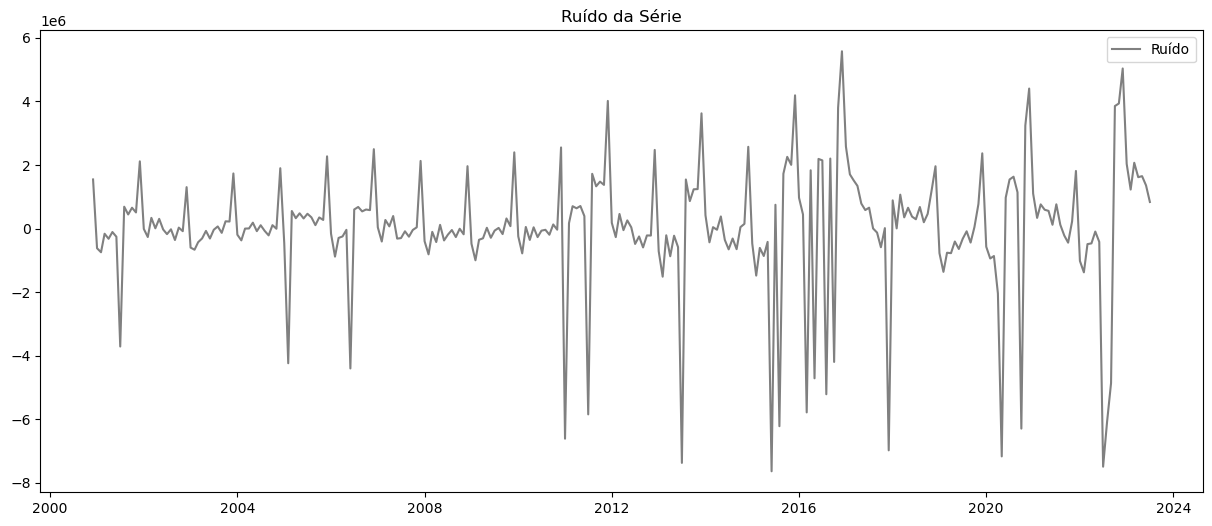

In [27]:
# 4. Eliminando a sazonalidade

ruido = sazonalidade_ruido - media_movel

plt.plot(ruido, label='Ruído', color='grey')
plt.title('Ruído da Série')
plt.legend(loc='best')
plt.show()

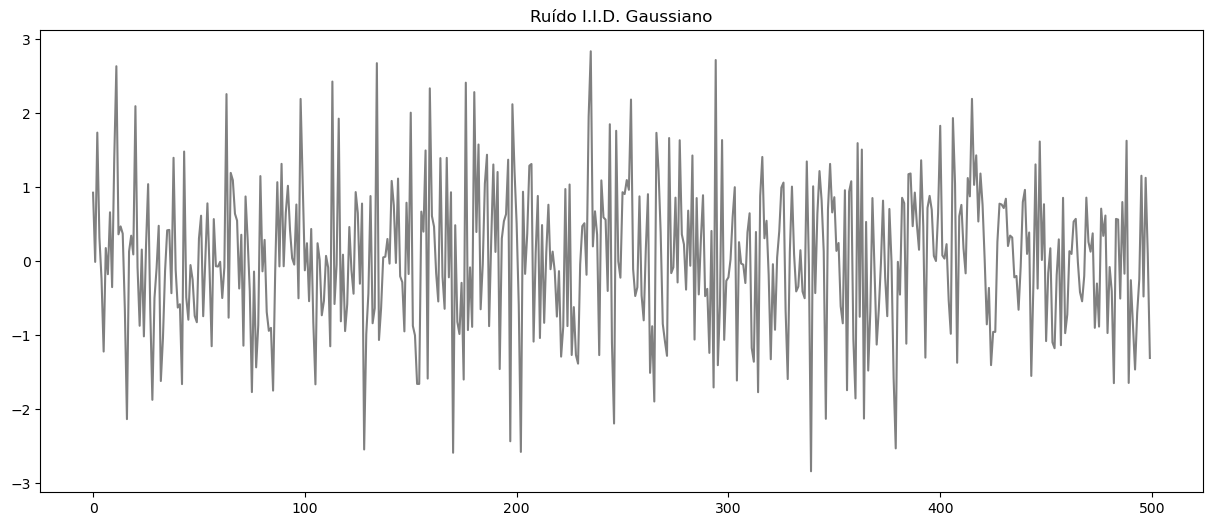

In [28]:
# 5. Analisando o resíduo para verificar se pertence a uma distribuição I.I.D.

# Série gerada por Ruído I.I.D Gaussiano
dados_iid = [gauss(0.0, 1.0) for i in range(500)] 
serie_iid = pd.Series(dados_iid)
serie_iid.plot(title='Ruído I.I.D. Gaussiano', color='grey')
plt.show()

C:\Users\Marco Antonio\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


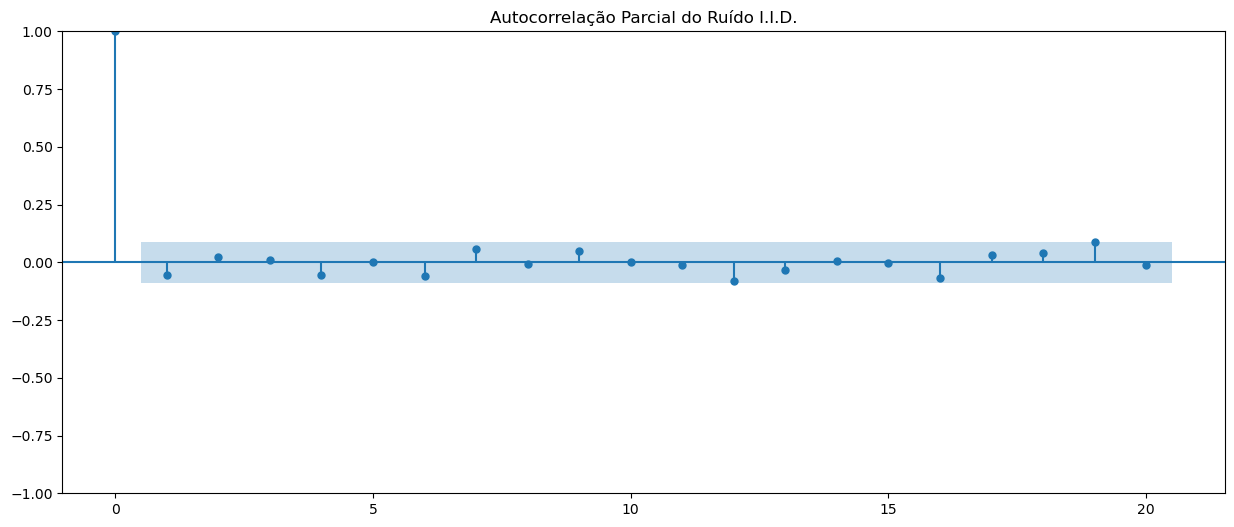

In [29]:
# Gerando o correlograma do ruído I.I.D.
 
smt.graphics.plot_pacf(serie_iid, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído I.I.D.")
plt.show()

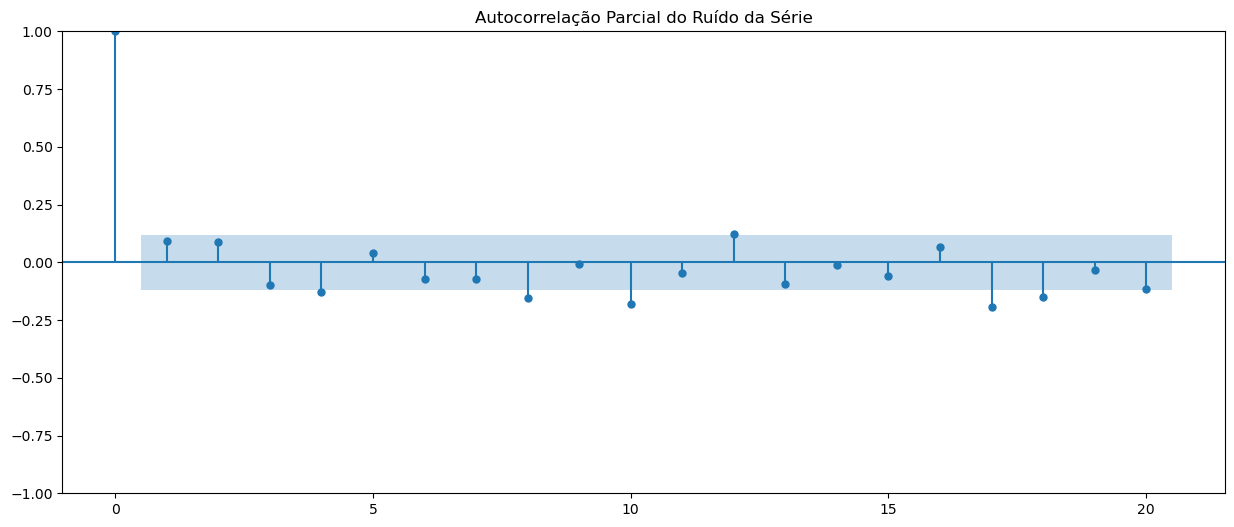

In [30]:
# Gerando o correlograma do ruído da série temporal em análise

ruido.dropna(inplace=True)
smt.graphics.plot_pacf(ruido, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído da Série")
plt.show()

Nota: Como muitos pontos de autocorrelação do ruído da série estão fora da zona em destaque (margem de 5%), não é possível afirmar que os dados do ruído da série têm uma distribuição I.I.D.

b. Roteiro 2:

Eliminar a tendência através de diferenciação
Eliminar a sazaonalidade através de diferenciação
Analisar o resíduo para verificar se pertence a uma distribuição iid.

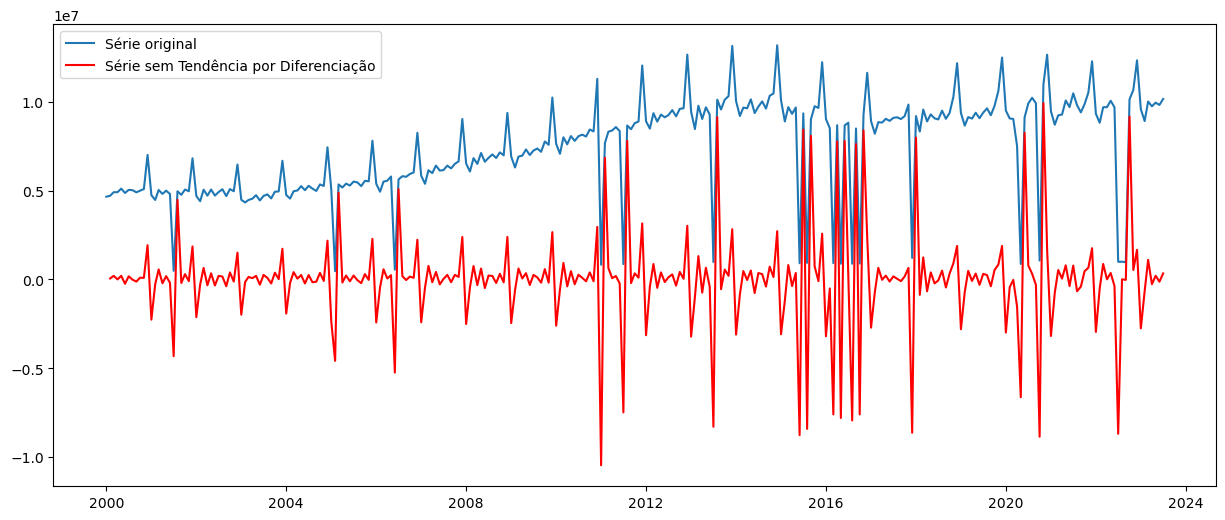

In [31]:
# 1. Eliminando a tendência através de diferenciação

vendas_ruido_sazonalidade = vendas_brasil_series - vendas_brasil_series.shift()
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(vendas_ruido_sazonalidade,color='red', label='Série sem Tendência por Diferenciação')
plt.legend(loc='best')
plt.show()

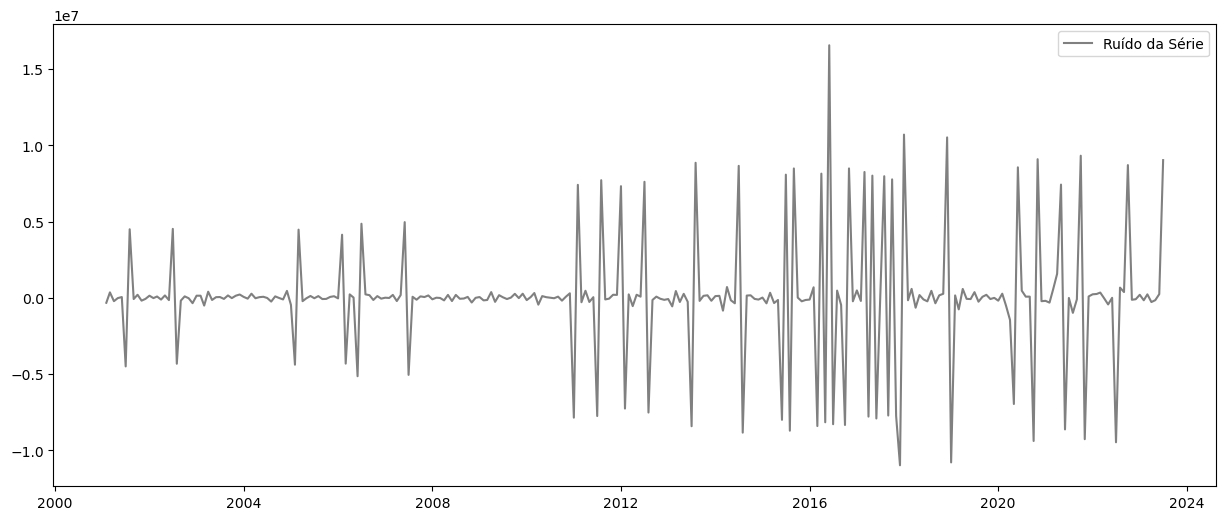

In [32]:
# 2. Eliminando a sazonalidade através de diferenciação

vendas_ruido = vendas_ruido_sazonalidade - vendas_ruido_sazonalidade.shift(periods=12)
plt.plot(vendas_ruido, label='Ruído da Série', color='grey')
plt.legend(loc='best')
plt.show()

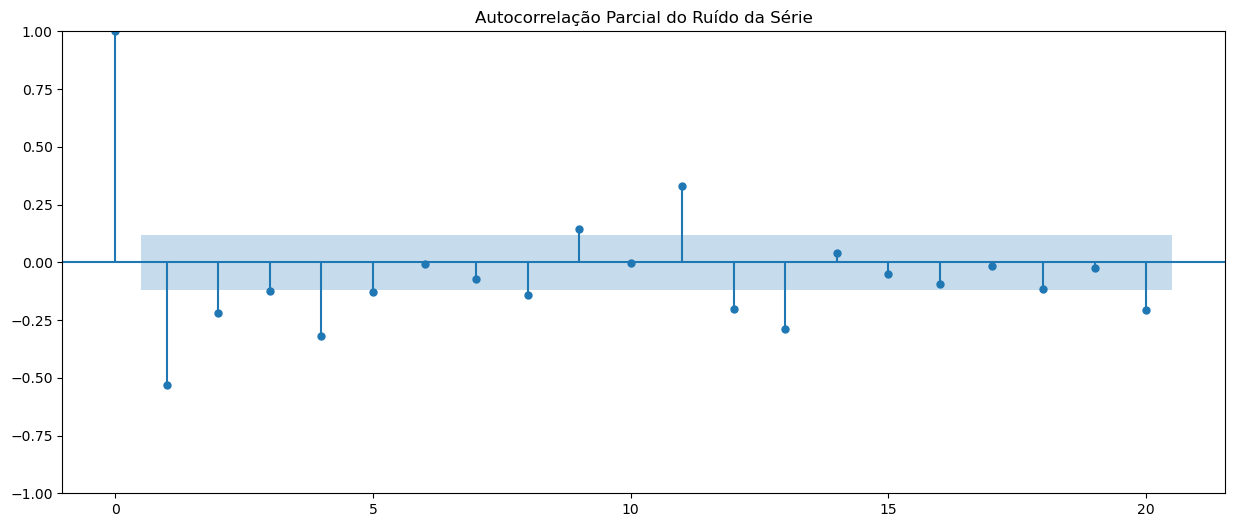

In [33]:
# 3. Analisando o resíduo para verificar se pertence a uma distribuição I.I.D.

# Gerando o correlograma do ruído da série temporal em análise

vendas_ruido.dropna(inplace=True)
smt.graphics.plot_pacf(vendas_ruido, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído da Série")
plt.show()

A partir da análise das séries decompostas, avalie se algum dos modelos é adequado para representar a série.

Utilize novamente a série vendas_brasil para testar um mecanismo de previsão. Trata-
se de um mecanismo mais simplificado, que terá como base a tendência estimada por
uma regressão linear. Realize os seguintes passos:

a. Estime a tendência utilizando regressão linear. Em python, utilize a função fit() do módulo Linear Regression
(https://www.statsmodels.org/stable/regression.html)

b. Elimine a tendência com o valor estimado pela regressão linear

c. Estime a sazonalidade através das médias móveis

d. Elimine a sazonalidade

e. Utilize a função predict() do modelo de regressão linear para gerar a reta de tendência para todos os índices da série

f. Adicione a tendência estimada à sazonalidade

g. Adicione ao resultado um ruído de média zero

h. Compare em um mesmo gráfico a série original e a série prevista

In [35]:
# 1. Estimando a tendência utilizando regressão linear

x1 = dados['Mês']
y = dados['Brasil']

s = pd.Series(y)
# s.head()
# print(f'{s.index}')

x = sm.add_constant(s.index)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Brasil   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           2.28e-25
Time:                        14:16:15   Log-Likelihood:                -4537.9
No. Observations:                 283   AIC:                             9080.
Df Residuals:                     281   BIC:                             9087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.761e+06   2.65e+05     17.969      0.000    4.24e+06    5.28e+06
x1          1.871e+04   1625.805     11.509      0.000    1.55e+04    2.19e+04
==============================================================================
Omnibus:                      137.509   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.759
Skew:                          -2.045   Prob(JB):                    3.57e-136
Kurtosis:                       9.015   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

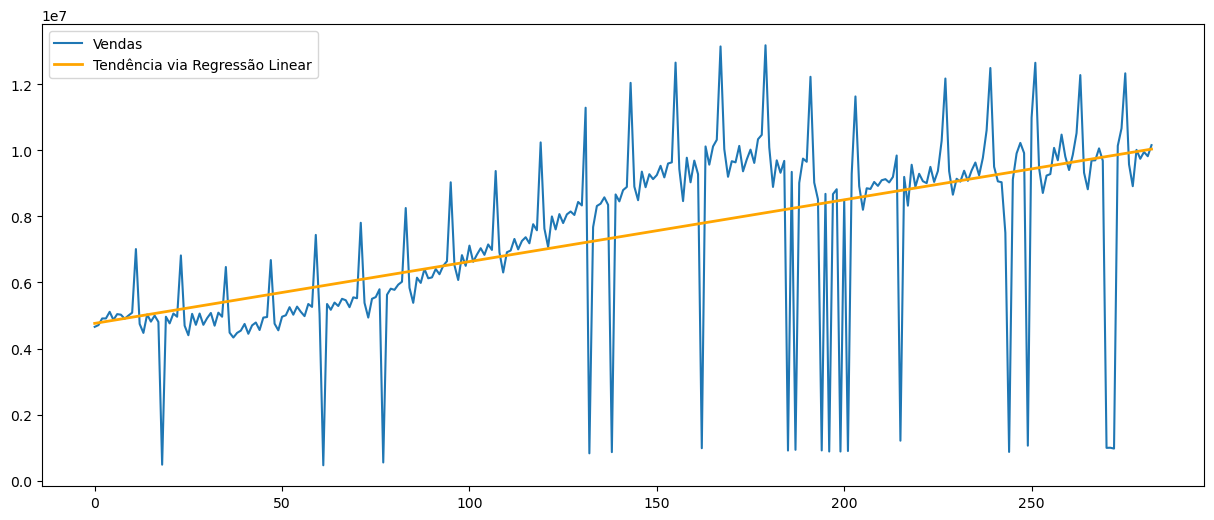

In [37]:
# Plotando a série e a tendência com o valor estimado pela regressão linear.

plt.plot(s.index, y, label='Vendas')
yhat = s.index * 1.871e+04 + 4.761e+06 # Estes coeficientes foram obtidos do relatório acima.
fig = plt.plot(s.index, yhat, lw=2, c='orange', label='Tendência via Regressão Linear')
plt.legend()
plt.show()

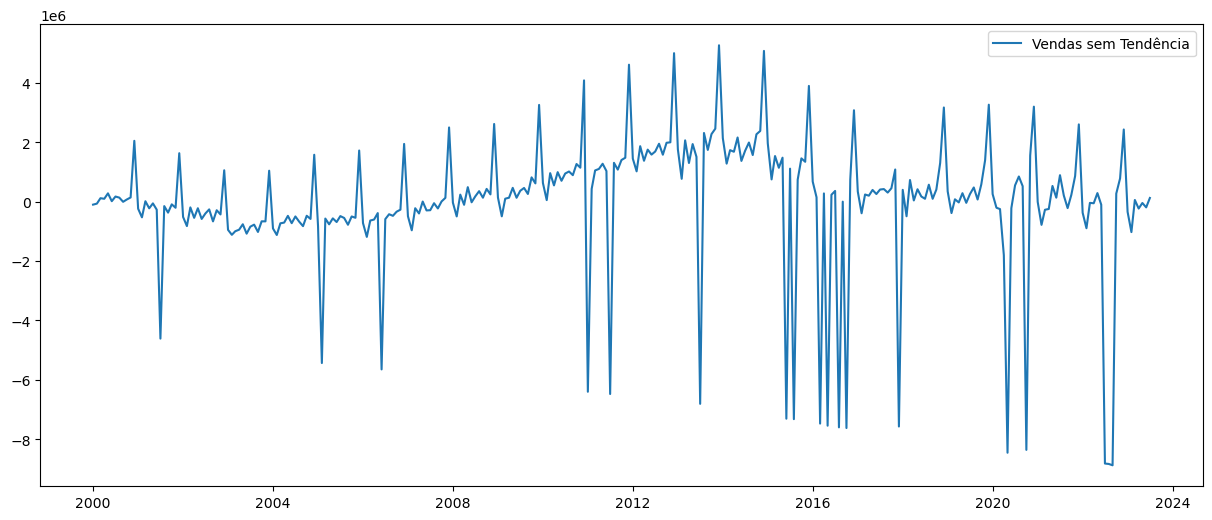

In [38]:
# 2. Eliminando a tendência com o valor estimado pela regressão linear

sazonalidade_ruido = y - yhat
plt.plot(x1, sazonalidade_ruido, label='Vendas sem Tendência')
plt.legend()
plt.show()

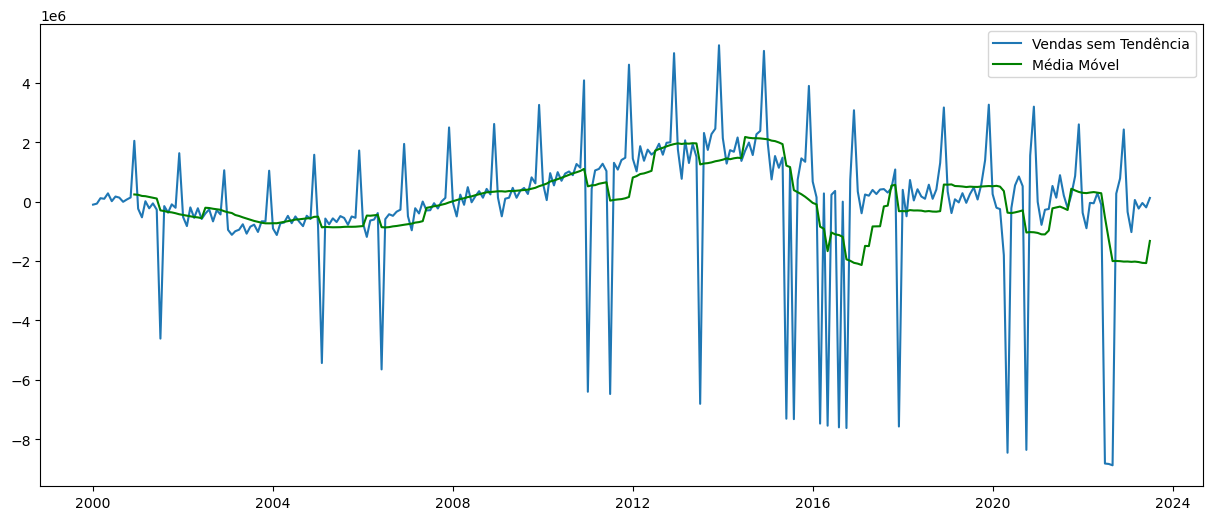

In [39]:
# 3. Estimando a sazonalidade através de médias móveis

media_movel = sazonalidade_ruido.rolling(window=12).mean()

plt.plot(x1, sazonalidade_ruido, label='Vendas sem Tendência')
plt.plot(x1, media_movel, color='green', label='Média Móvel')
plt.legend(loc='best')
plt.show()

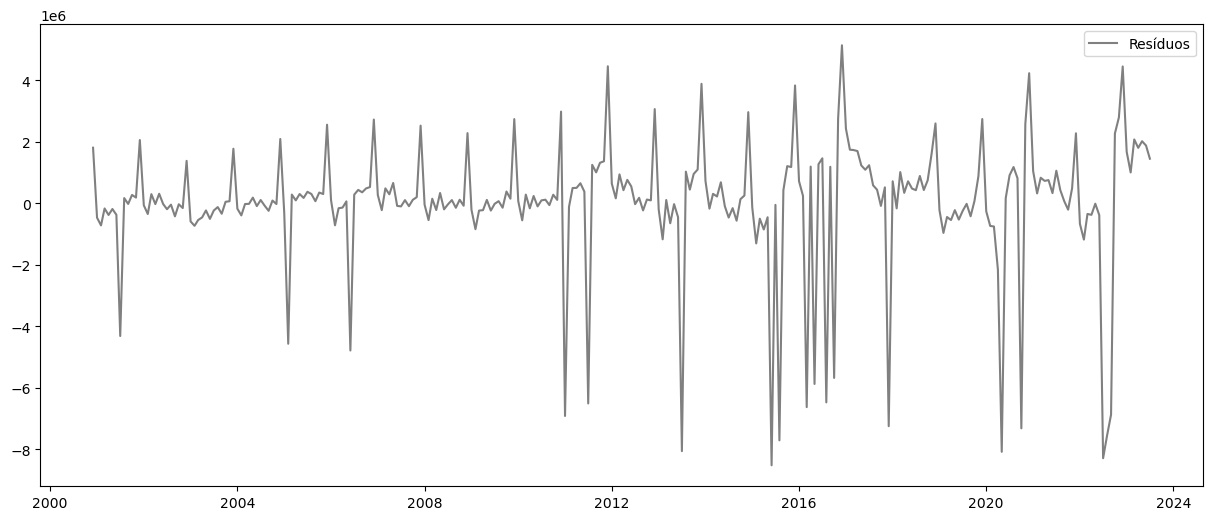

In [40]:
# 4. Eliminando a sazonalidade

ruido = sazonalidade_ruido - media_movel

#plt.plot(x1, sazonalidade_ruido, label='Vendas sem Tendência')
plt.plot(x1, ruido, color='grey', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [41]:
# 5. Utilizando ao função predict() do modelo de regressão linear para gerar a reta de tendência para todos os índices da série.

tendencia = results.predict(x)

print_model = results.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Brasil   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           2.28e-25
Time:                        14:18:40   Log-Likelihood:                -4537.9
No. Observations:                 283   AIC:                             9080.
Df Residuals:                     281   BIC:                             9087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.761e+06   2.65e+05     17.969      0.0

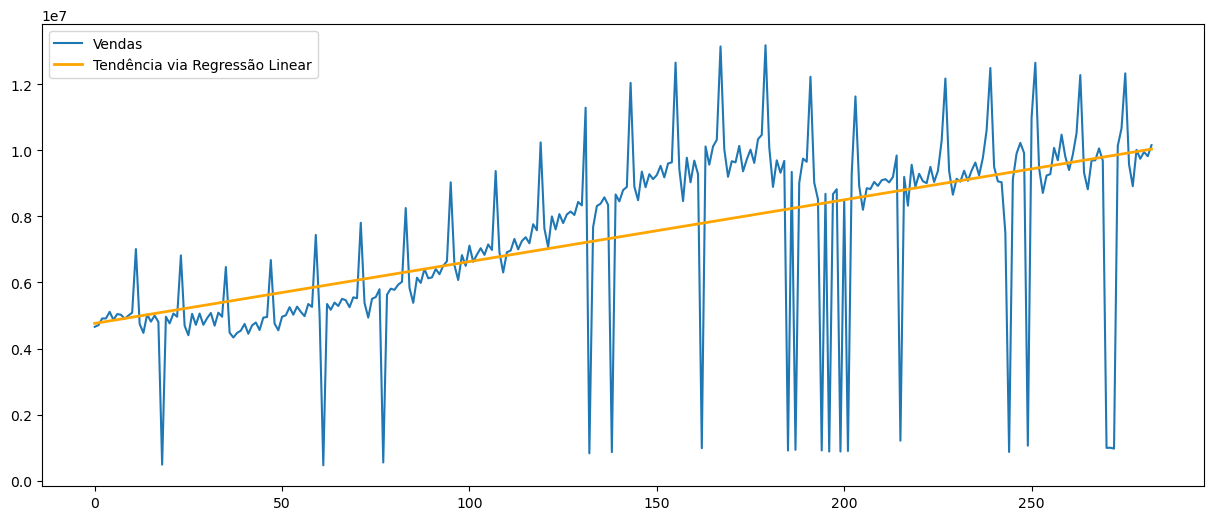

In [42]:
# Plotando a série original e a reta de tendência obtida com a função predict()

plt.plot(s.index, y, label='Vendas')
fig = plt.plot(s.index, tendencia, lw=2, c='orange', label='Tendência via Regressão Linear')
plt.legend()
plt.show()

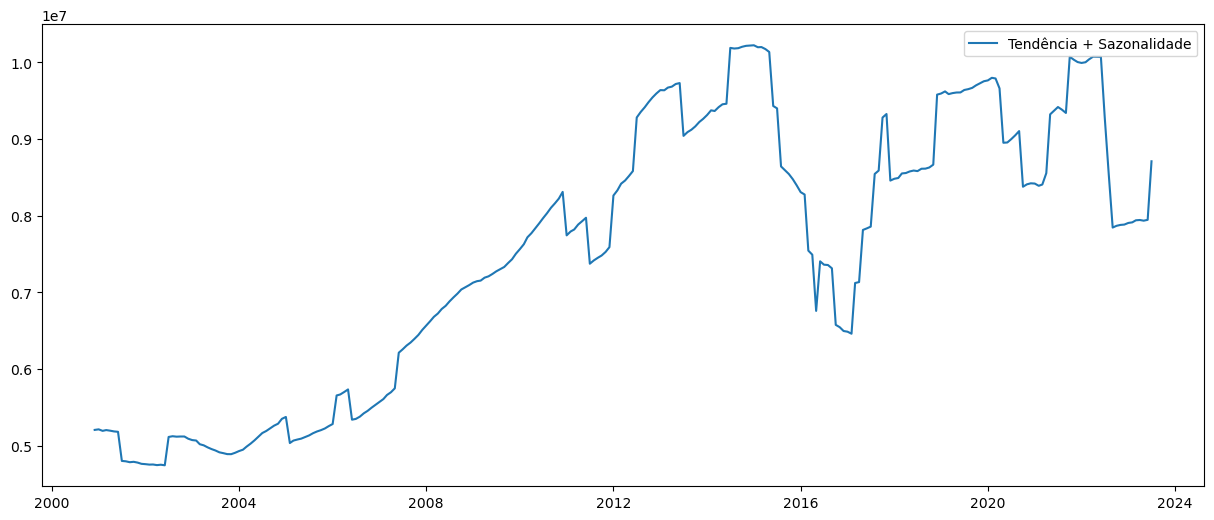

In [43]:
# 6. Adicionando a tendência estimada à sazonalidade

tendencia_sazonalidade = media_movel + tendencia

plt.plot(x1, tendencia_sazonalidade, label='Tendência + Sazonalidade')
plt.legend(loc='best')
plt.show()

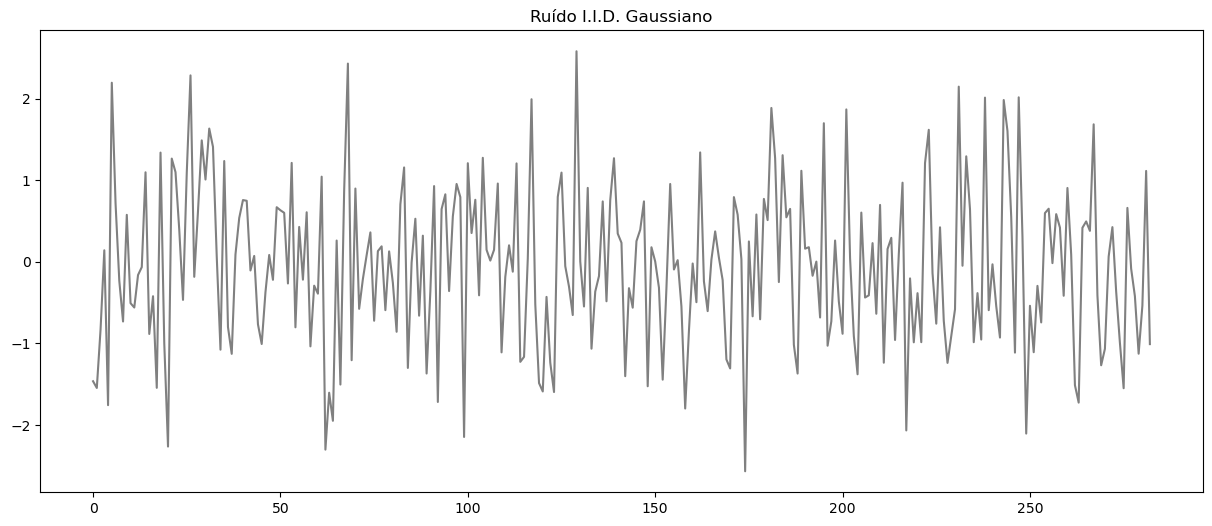

In [44]:
# 7. Adicionando um ruído branco de média zero.

# Série gerada por Ruído I.I.D Gaussiano
dados_iid = [gauss(0.0, 1.0) for i in range(283)]
serie_iid = pd.Series(dados_iid)
serie_iid.plot(title='Ruído I.I.D. Gaussiano', color='grey')
plt.show()

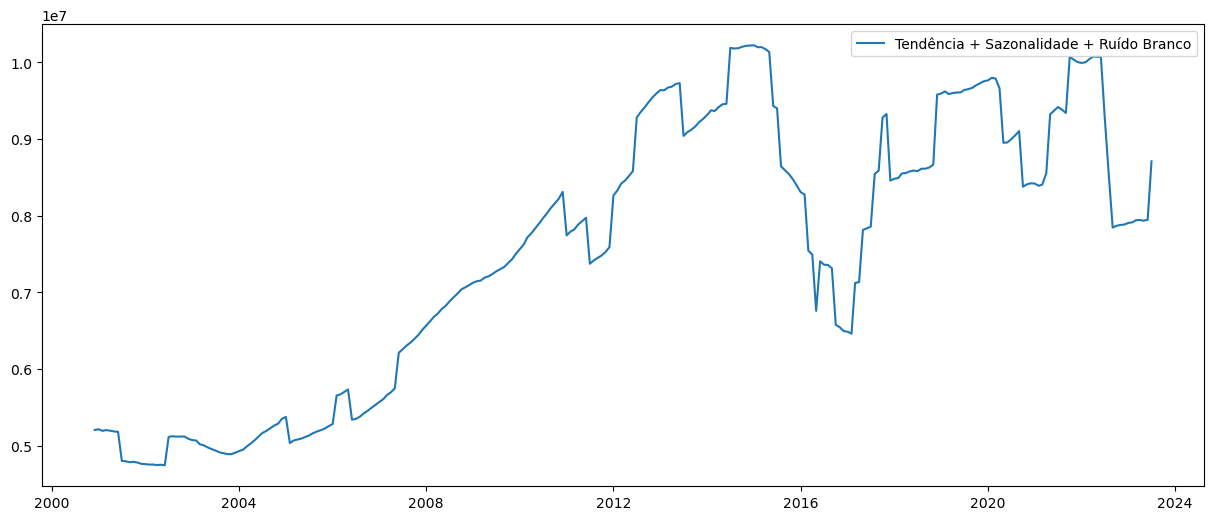

In [45]:
# Plotando o resultado da soma do ruído à sazonalidade
tendencia_sazonalidade_ruido = tendencia_sazonalidade + serie_iid
plt.plot(x1, tendencia_sazonalidade_ruido, label='Tendência + Sazonalidade + Ruído Branco')
plt.legend(loc='best')
plt.show()

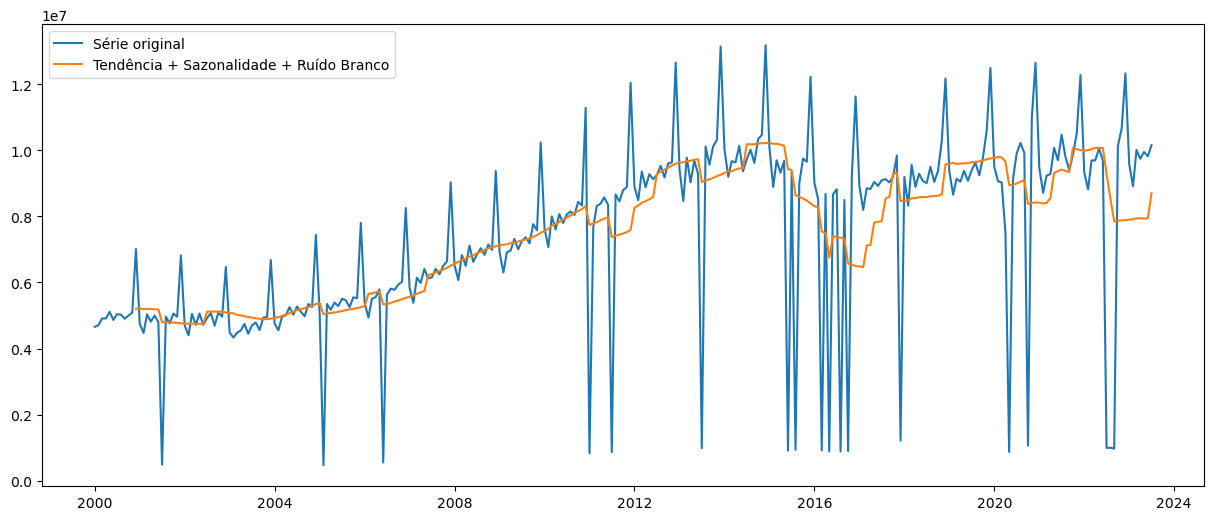

In [46]:
# 8. Comparando em um mesmo gráfico a série original e a série prevista.

plt.plot(x1, y, label='Série original')
plt.plot(x1, tendencia_sazonalidade_ruido, label='Tendência + Sazonalidade + Ruído Branco')
plt.legend(loc='best')
plt.show()